# 19.3 Assumptions of Linear Regression Assignment 1
## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of [this dataset from Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

## Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Import the data the print the first 5 items
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Understand what are the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [4]:
# Y is the target variable
Y = df['temperature']

# X are the explanatory variables
X = df[['humidity', 'windspeed', 'windbearing', 'pressure']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

X_OLS = sm.add_constant(X)

results = sm.OLS(Y, X_OLS).fit()
results.summary()


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528529


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:04:39   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumption 1: Linearity of the Model in its Coefficients
The chart below shows the linearity of the model. 

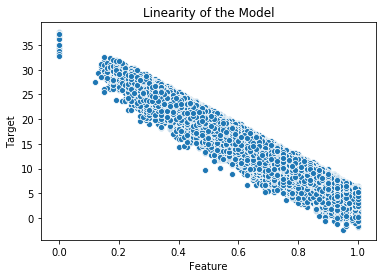

In [5]:
# predictions of the linear regression
predictions = lrm.predict(X)

# we plot the estimated Y and X
# the relationship should be quadratic
sns.scatterplot(df['humidity'], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Linearity of the Model')
plt.show()

## Assumption 2: The Error term Should be Zero
Looking at the mean of the errors below, the error term is so small that the error term is essentially zero. This assumptions shows the correctness of the model.

In [6]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: -9.806584448838764e-16


## Assumption 3: Homoscedasticity
Looking at the barlett and levene tests below, the p-value is zero, which means we reject the null hypothesis and the model is heteroscedastic. This means the the error term is not constant accross all features. 

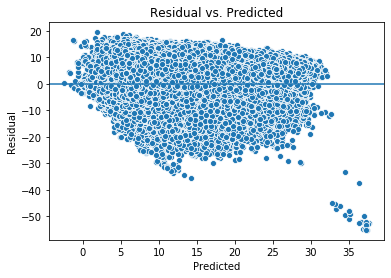

In [7]:
sns.scatterplot(predictions, errors)

plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')

plt.axhline(y=0)
plt.show()

In [8]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


## Assumption 4: Low Multicollinearity
Looking at the heatmap below, most of the features are uncorrelated to one another except for humidity. Humidity is .63 correlated to temperature, which means that it makes it harder for the model to estimate the relationship between each independent variable and the dependent variable.

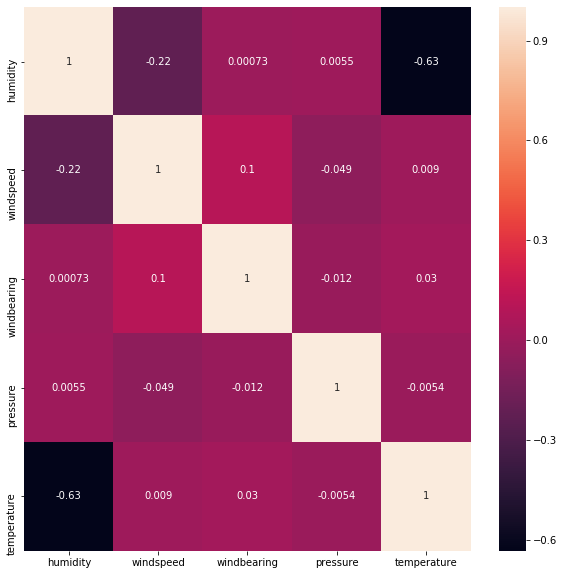

In [9]:
variables = df[['humidity', 'windspeed', 'windbearing', 'pressure', 'temperature']]

plt.figure(figsize=(10,10))
sns.heatmap(variables.corr(), annot=True)
plt.show()

## Assumption 5: Uncorrelated Error Terms
The errors are correlated with one another due to the autocorrelation function ranging from .95 to .70. This means that error terms in one observation predicts the error of another. 

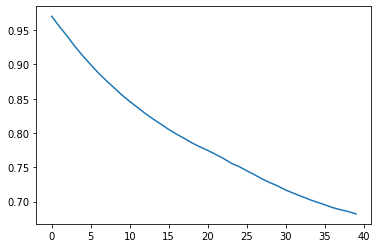

In [10]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

## Assumption 6: Features not Correlated with Errors
The features are not highly correlated with errors in the heatmap below. This means that the errors and features are independent from one another.

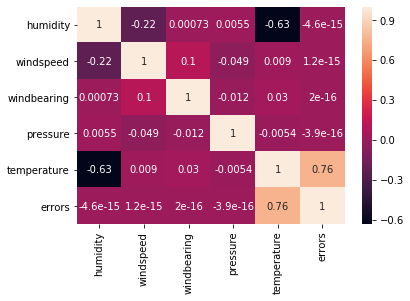

In [11]:
variables['errors'] = errors
sns.heatmap(variables.corr(), annot=True)
plt.show()

## Conclusion
Overall, the model fit most of the Gauss-Markov conditions. There were several assumptions where the model did not met the assumptions. The implicaitons of those will be dicussed here. Assumption 3, homoscedasiticity, was not met. This indicates that the error term is not equal throughout all the terms. This can bias the results and lead to incorrect conclusions about the regression coefficients. The other failed assumption is assumption 5, uncorrelated error terms. The correlated error term could imply the presence of another variable or it signify the relationship between the variables. 